In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils.analysis import Tree
from utils.fileUtils.sr import NMSSM_MX_700_MY_400, QCD_B_List, TTJets
from utils.fileUtils import *
from utils.xsecUtils import *
from utils.plotter import plot
from utils.useCMSstyle import *

In [3]:
import awkward as ak
import numpy as np
import uproot

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [5]:
import vector
def get_p4(pt, eta, phi, m):
    return vector.obj(pt=pt, eta=eta, phi=phi, m=m)

def sum_p4s(*args):
    n = len(args)
    if n == 1: return args
    else:
        p4 = args[0]
        for arg in args[1:]:
            p4 += arg
    return p4

In [6]:
def x_bins(bins):
    return (bins[:-1] + bins[1:])/2

In [ ]:
signal_tree = Tree(NMSSM_MX_700_MY_400)
bkgd_tree = Tree(QCD_B_List + [TTJets])

In [9]:
tight_b = 0.7264
medium_b = 0.2770
loose_b = 0.0494

Compare multiplicities before selections and after selections

In [21]:
t['Jet_']

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'btagWeight_CSVV2',
 'btagWeight_DeepCSVB',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'CorrT1METJet_area',
 'CorrT1METJet_eta',
 'CorrT1METJet_muonSubtrFactor',
 'CorrT1METJet_phi',
 'CorrT1METJet_rawPt',
 'nElectron',
 'Electron_deltaEtaSC',
 'Electron_dr03EcalRecHitSumEt',
 'Electron_dr03HcalDepth1TowerSumEt',
 'Electron_dr03TkSumPt',
 'Electron_dr03TkSumPtHEEP',
 'Electron_dxy',
 'Electron_dxyErr',
 'Electron_dz',
 'Electron_dzErr',
 'Electron_eCorr',
 'Electron

In [7]:
# nJet = ak.Array(())
# btag = ak.Array(())
# pt = ak.Array(())
idx = ak.Array(())
# flav = ak.Array(())
for i in range(1,51):
    t = uproot.open(f"root://cmseos.fnal.gov//store/group/lpchbb/srosenzw/XYH_YToHH/CRAB_PrivateMC/srosenzw_NMSSM_XYH_YToHH_6b_MX_700_MY_400_sl7_nano_500k/210903_001447/0000/nanoAOD_step_{i}.root:Events")
    # nJet = ak.concatenate((nJet, t['nJet'].array()))
    # btag = ak.concatenate((btag, t['Jet_btagDeepFlavB'].array()))
    # pt = ak.concatenate((pt, t['Jet_pt'].array()))
    idx = ak.concatenate((idx, t['Jet_signalID']))
    # flav = ak.concatenate((flav, t['Jet_partonFlavour'].array()))
nJet = nJet.to_numpy()
# btag = ak.flatten(btag).to_numpy()
# pt = ak.flatten(pt).to_numpy()

In [ ]:
# b_mask = ak.where(flav < 0, -flav, flav) == 5
# light_j_mask = ak.where(flav < 0, -flav, flav) == 0
# c_mask = ak.where(flav < 0, -flav, flav) == 4
# n_btrue = ak.sum(b_mask, axis=1)

In [10]:
med_plus = btag > medium_b
tight_less = btag < tight_b
loose_plus = btag > loose_b
med_less = btag < medium_b

In [11]:
tight_pt = pt[btag > tight_b]
medium_pt = pt[med_plus & tight_less]
loose_pt = pt[loose_plus & med_less]

In [ ]:
loose_sigID = 

In [12]:
sorted_pt = ak.sort(pt, axis=1)[:,::-1]

In [13]:
n_tight = ak.sum(btag > tight_b, axis=1)
n_med = ak.sum(btag > medium_b, axis=1) - n_tight
n_loose = ak.sum(btag > loose_b, axis=1) - n_tight - n_med
n_fail = ak.sum(btag < loose_b, axis=1)

In [20]:
ak.sum(loose_pt > 30, axis=1)

<Array [2, 1, 0, 0, 1, 0, ... 1, 0, 0, 0, 0, 1] type='50000 * int64'>

In [14]:
n_sum = n_tight + n_med + n_loose + n_fail
n_btag = n_tight + n_med + n_loose
n_tagged_selected = ak.sum(signal_tree.jet_btag > loose_b, axis=1)

NameError: name 'signal_tree' is not defined

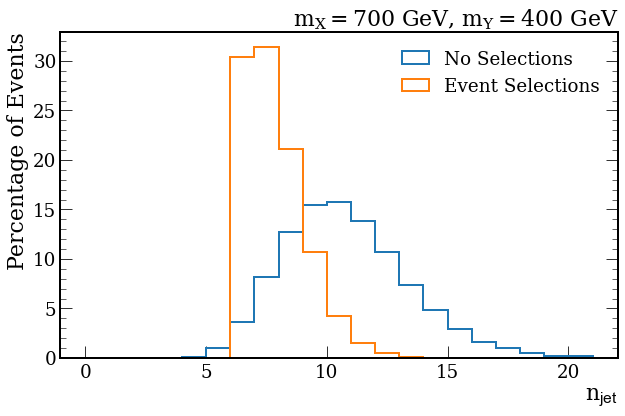

In [ ]:
n, b = np.histogram(nJet, bins=np.arange(22))
x = (b[1:] + b[:-1])/2
fig, ax, n, b = plot(x=x, weights=n/n.sum()*100, bins=b, label='No Selections', linewidth=2)
n, b = np.histogram(signal_tree.n_jet.to_numpy(), bins=np.arange(22))
x = (b[1:] + b[:-1])/2
fig, ax, n, b = plot(x=x, weights=n/n.sum()*100, bins=b, label='Event Selections', linewidth=2, fig=fig, ax=ax)
ax.set_xlabel(r'$n_\mathrm{jet}$')
ax.set_ylabel('Percentage of Events')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
fig.savefig('plots/selected_jet_mult.pdf', bbox_inches='tight')

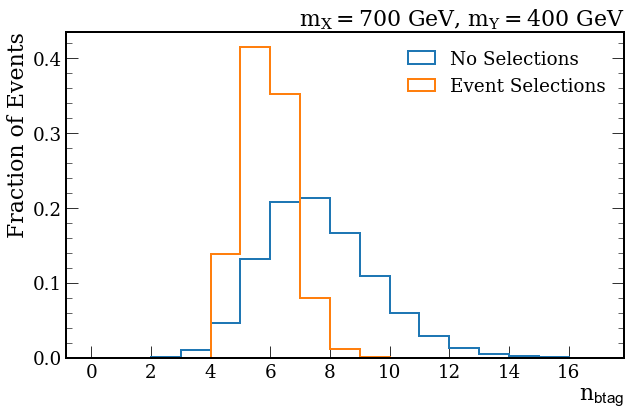

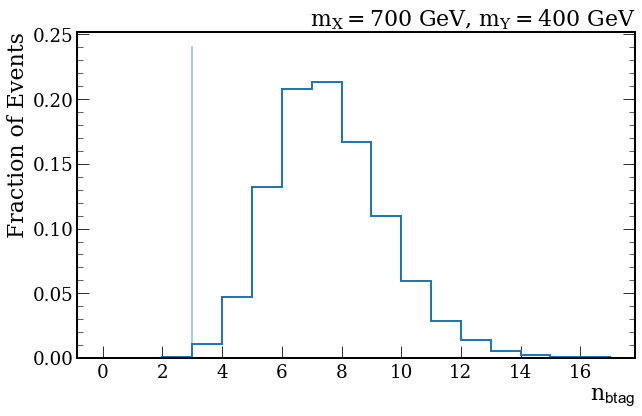

In [ ]:
b_mult_bins = np.arange(18)
n_l, b = np.histogram(n_btag.to_numpy(), bins=b_mult_bins)
x = (b[1:] + b[:-1])/2
fig, ax, n, b = plot(x=x, weights=n_l/n_l.sum(), bins=b_mult_bins, linewidth=2, label='No Selections')
n_b, b = np.histogram(n_tagged_selected.to_numpy(), bins=b_mult_bins)
x = (b[1:] + b[:-1])/2
fig, ax, n, b = plot(x=x, weights=n_b/n_b.sum(), bins=b_mult_bins, linewidth=2, label='Event Selections', fig=fig, ax=ax)
# ax.text(1,1,r'$m_X = 700$ GeV, $m_Y = 400$ GeV', transform=ax.transAxes, rotation=270, va='top')
ax.set_xlabel(r'$n_\mathrm{btag}$')
ax.set_ylabel('Fraction of Events')
ax.set_xticks(np.arange(0,18,2))
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
fig.savefig('sel_b_mult.pdf', bbox_inches='tight')

# b_mult_bins = np.arange(18)
# n_l, b = np.histogram(n_btag.to_numpy(), bins=b_mult_bins)
# x = (b[1:] + b[:-1])/2
# fig, ax, n, b = plot(x=x, weights=n_l/n_l.sum(), bins=b_mult_bins, linewidth=2)#, label='Loose')
# ax.plot([3,3],[0,0.24],c='C0',alpha=0.5)
# # n_b, b = np.histogram(n_btrue.to_numpy(), bins=b_mult_bins)
# # x = (b[1:] + b[:-1])/2
# # fig, ax, n, b = plot(x=x, weights=n_b/n_b.sum(), bins=b_mult_bins, linewidth=2, label='True', fig=fig, ax=ax)
# ax.set_xlabel(r'$n_\mathrm{btag}$')
# ax.set_ylabel('Percentage of Events')
# ax.set_title('Signal Event b-Jet Multiplicity')
# ax.set_xticks(np.arange(0,18,2))
# fig.savefig('loose_b_mult.pdf', bbox_inches='tight')

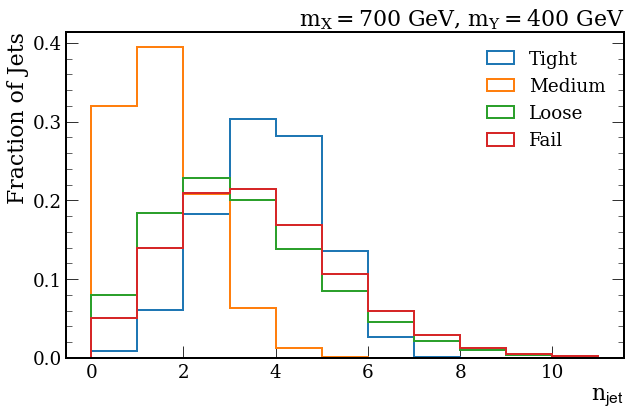

In [ ]:
b_mult_bins = np.arange(12)
n_t, b = np.histogram(n_tight.to_numpy(), bins=b_mult_bins)
x = (b[1:] + b[:-1])/2
fig, ax, n, b = plot(x=x, weights=n_t/n_t.sum(), bins=b_mult_bins, linewidth=2, label='Tight')
n_m, b = np.histogram(n_med.to_numpy(), bins=b_mult_bins)
fig, ax, n, b = plot(x=x, weights=n_m/n_m.sum(), bins=b_mult_bins, linewidth=2, label='Medium', fig=fig, ax=ax)
n_l, b = np.histogram(n_loose.to_numpy(), bins=b_mult_bins)
fig, ax, n, b = plot(x=x, weights=n_l/n_l.sum(), bins=b_mult_bins, linewidth=2, label='Loose', fig=fig, ax=ax)
n_f, b = np.histogram(n_fail.to_numpy(), bins=b_mult_bins)
fig, ax, n, b = plot(x=x, weights=n_f/n_f.sum(), bins=b_mult_bins, linewidth=2, label='Fail', fig=fig, ax=ax)
ax.set_xlabel(r'$n_\mathrm{jet}$')
ax.set_ylabel('Percentage of Jets')
ax.set_title('b Jet Multiplicity')
fig.savefig('btag_jet_mult.pdf', bbox_inches='tight')

In [ ]:
loose_sorted_pt = ak.pad_none(loose_sorted_pt, 4)

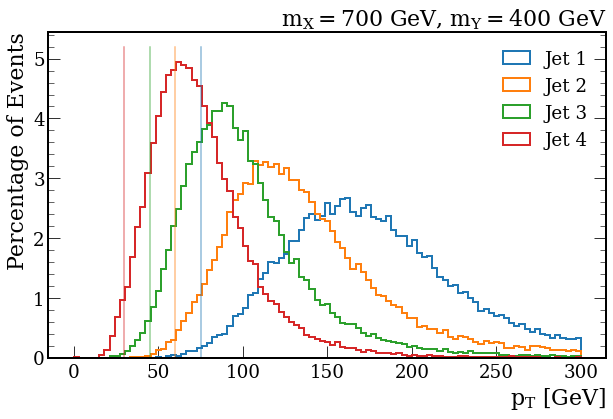

In [ ]:
pt_bins = np.linspace(0,300,100)
n_t, b = np.histogram(sorted_pt[:,0].to_numpy(), bins=pt_bins)
x = (b[1:] + b[:-1])/2
fig, ax, n, b = plot(x=x, weights=n_t/n_t.sum()*100, bins=pt_bins, linewidth=2, label=r'Jet 1')
n_m, b = np.histogram(sorted_pt[:,1].to_numpy(), bins=pt_bins)
fig, ax, n, b = plot(x=x, weights=n_m/n_m.sum()*100, bins=pt_bins, linewidth=2, label='Jet 2', fig=fig, ax=ax)
n_l, b = np.histogram(sorted_pt[:,2].to_numpy(), bins=pt_bins)
fig, ax, n, b = plot(x=x, weights=n_l/n_l.sum()*100, bins=pt_bins, linewidth=2, label='Jet 3', fig=fig, ax=ax)
n_z, b = np.histogram(sorted_pt[:,3].to_numpy(), bins=pt_bins)
fig, ax, n, b = plot(x=x, weights=n_z/n_z.sum()*100, bins=pt_bins, linewidth=2, label='Jet 4', fig=fig, ax=ax)
ax.plot([75,75],[0,n.max()*1.05],c='C0', alpha=0.5)
ax.plot([30,30],[0,n.max()*1.05],c='C3', alpha=0.5)
ax.plot([45,45],[0,n.max()*1.05],c='C2', alpha=0.5)
ax.plot([60,60],[0,n.max()*1.05],c='C1', alpha=0.5)
ax.set_xlabel(r'$p_T$ [GeV]')
ax.set_ylabel('Percentage of Events')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
fig.savefig('plots/sorted_pt.pdf', bbox_inches='tight')

In [ ]:
HT = ak.sum(pt, axis=1)

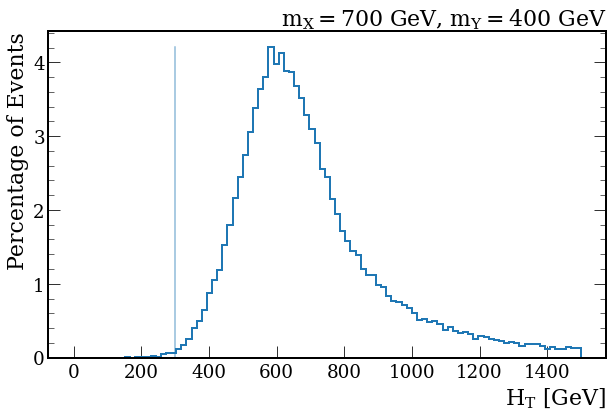

In [ ]:
HT_bins = np.linspace(0,1500,100)
n_t, b = np.histogram(HT.to_numpy(), bins=HT_bins)
x = (b[1:] + b[:-1])/2
fig, ax, n, b = plot(x=x, weights=n_t/n_t.sum()*100, bins=HT_bins, linewidth=2)
ax.plot([300,300],[0,n.max()],c='C0', alpha=0.5)
ax.set_xlabel(r'$H_T$ [GeV]')
ax.set_ylabel('Percentage of Events')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
fig.savefig('plots/HT_dist.pdf', bbox_inches='tight')

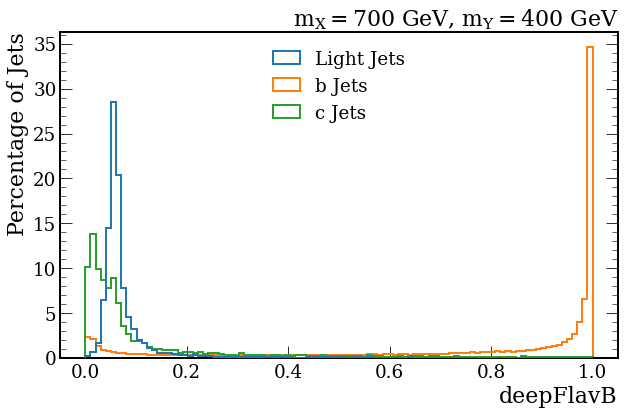

In [ ]:
n, b = np.histogram(ak.flatten(btag[light_j_mask]).to_numpy(), bins=np.linspace(0,1,100))
x = (b[1:] + b[:-1])/2
fig, ax, n, b = plot(x=x, weights=n/n.sum()*100, bins=np.linspace(0,1.00,100), linewidth=2, label='Light Jets', zorder=10)
n, b = np.histogram(ak.flatten(signal_tree.signal_jet_btag).to_numpy(), bins=np.linspace(0,1,100))
x = (b[1:] + b[:-1])/2
fig, ax, n, b = plot(x=x, weights=n/n.sum()*100, bins=np.linspace(0,1.00,100), linewidth=2, label='b Jets', fig=fig, ax=ax)
n, b = np.histogram(ak.flatten(btag[c_mask]).to_numpy(), bins=np.linspace(0,1,100))
x = (b[1:] + b[:-1])/2
fig, ax, n, b = plot(x=x, weights=n/n.sum()*100, bins=np.linspace(0,1.00,100), linewidth=2, label='c Jets', fig=fig, ax=ax)
ax.legend(loc=2)
ax.set_xlabel('deepFlavB')
ax.set_ylabel('Percentage of Jets')
ax.set_title(r'$m_X = 700$ GeV, $m_Y = 400$ GeV', loc='right')
ax.legend(loc=9)
fig.savefig('plots/btag.pdf', bbox_inches='tight')
# fig.savefig('selected_btag.pdf', bbox_inches='tight')